In [1]:
class Particle:
   def __init__(self, x, y, ang_vel):
       self.x = x
       self.y = y
       self.ang_vel = ang_vel

In [2]:
class ParticleSimulator:
   def __init__(self, particles):
       self.particles = particles
   def evolve(self, dt):
       timestep = 0.00001
       nsteps = int(dt/timestep)
       for i in range(nsteps):
           for p in self.particles:
               # 1. calculate the direction
               norm = (p.x**2 + p.y**2)**0.5
               v_x = -p.y/norm
               v_y = p.x/norm
               # 2. calculate the displacement
               d_x = timestep * p.ang_vel * v_x
               d_y = timestep * p.ang_vel * v_y
               p.x += d_x
               p.y += d_y
               # 3. repeat for all the time steps

In [6]:
from matplotlib import pyplot as plt
from matplotlib import animation
def visualize(simulator):
   X = [p.x for p in simulator.particles]
   Y = [p.y for p in simulator.particles]
   fig = plt.figure()
   ax = plt.subplot(111, aspect='equal')
   line, = ax.plot(X, Y, 'ro')
   # Axis limits
   plt.xlim(-1, 1)
   plt.ylim(-1, 1)
   # It will be run when the animation starts
   def init():
       line.set_data([], [])
       return line, # The comma is important!
   def animate(i):
       # We let the particle evolve for 0.01 time units
       simulator.evolve(0.01)
       X = [p.x for p in simulator.particles]
       Y = [p.y for p in simulator.particles]
       line.set_data(X, Y)
       return line,
           # Call the animate function each 10 ms
   anim = animation.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)
   plt.show()

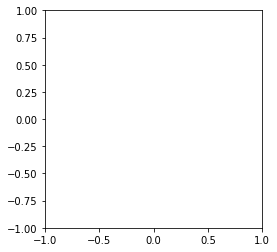

In [9]:
def test_visualize():
   particles = [Particle(0.3, 0.5, 1),
                Particle(0.0, -0.5, -1),
                Particle(-0.1, -0.4, 3)]
   simulator = ParticleSimulator(particles)
   visualize(simulator)
if __name__ == '__main__':
   test_visualize()


In [10]:
def test_evolve():
   particles = [Particle( 0.3,  0.5, +1),
                Particle( 0.0, -0.5, -1),
                Particle(-0.1, -0.4, +3)]
   simulator = ParticleSimulator(particles)
   simulator.evolve(0.1)
   p0, p1, p2 = particles
   def fequal(a, b, eps=1e-5):
       return abs(a - b) < eps
   assert fequal(p0.x, 0.210269)
   assert fequal(p0.y, 0.543863)
   assert fequal(p1.x, -0.099334)
   assert fequal(p1.y, -0.490034)
   assert fequal(p2.x,  0.191358)
   assert fequal(p2.y, -0.365227)

In [11]:
import cProfile
cProfile.run("test_evolve()")

         21 function calls in 0.023 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <ipython-input-1-051f5cb14649>:2(__init__)
        1    0.000    0.000    0.023    0.023 <ipython-input-10-89f561686870>:1(test_evolve)
        6    0.000    0.000    0.000    0.000 <ipython-input-10-89f561686870>:8(fequal)
        1    0.000    0.000    0.000    0.000 <ipython-input-2-fb1c2c0a4675>:2(__init__)
        1    0.023    0.023    0.023    0.023 <ipython-input-2-fb1c2c0a4675>:4(evolve)
        1    0.000    0.000    0.023    0.023 <string>:1(<module>)
        6    0.000    0.000    0.000    0.000 {built-in method builtins.abs}
        1    0.000    0.000    0.023    0.023 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [14]:
%prun test_evolve()